In [6]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def color_aug(img, random_h=36, random_l=50, random_s=50):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS).astype(float)

    # random.setstate(prev_state)
    h = (random.random() * 2 - 1.0) * random_h
    l = (random.random() * 2 - 1.0) * random_l
    s = (random.random() * 2 - 1.0) * random_s

    img[..., 0] += h
    img[..., 0] = np.minimum(img[..., 0], 180)

    img[..., 1] += l
    img[..., 1] = np.minimum(img[..., 1], 255)

    img[..., 2] += s
    img[..., 2] = np.minimum(img[..., 2], 255)

    img = np.maximum(img, 0)
    img = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_HLS2BGR)
    return img

In [3]:
image1 = r"D:\deepfakes\extracted_real_images\doniqevxeg_80.png"

img1 = cv2.imread(image1)
img2 = cv2.imread(image1)
img3 = cv2.imread(image1)
img4 = cv2.imread(image1)

In [11]:
images = [img1, img2, img3, img4]
new_images = []

for i in range(1, len(images), 2):
    prev_state = random.getstate()
    new_img1 = color_aug(images[i])
    new_img1 = new_img1[..., ::-1]
    new_images.append(new_img1)
    random.setstate(prev_state)
    new_img2 = color_aug(images[i-1])
    new_img2 = new_img2[..., ::-1]
    new_images.append(new_img2)

In [12]:
img1 = new_images[0]
img2 = new_images[1]
img3 = new_images[2]
img4 = new_images[3]

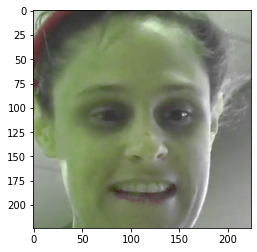

In [13]:
plt.imshow(img1)

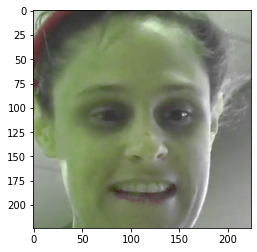

In [14]:
plt.imshow(img2)

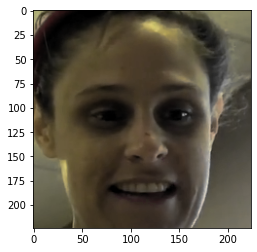

In [15]:
plt.imshow(img3)

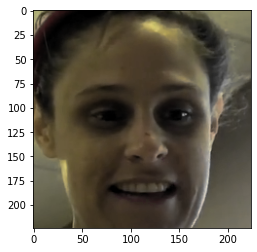

In [16]:
plt.imshow(img4)